In [303]:
import pandas as pd
import numpy as np
import time
import datetime
from datetime import datetime, timedelta, timezone
NoneType = type(None) 

In [304]:
df_any = pd.read_json (r'test_frame_V1.json')
df_any.columns

# df_any['Начало'] = df_any['Начало'].astype(datetime)

dtn_ = datetime.now().isoformat()   
dtn = datetime.strptime(dtn_+'Z', '%Y-%m-%dT%H:%M:%S.%fZ')

df_any['Дата рождения']=\
df_any['Дата рождения']\
.apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

df_any['Начало']=\
df_any['Начало']\
.apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ'))

df_any['Окончание']=\
df_any['Окончание']\
.apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ') if not isinstance(x, NoneType) else 0)


df_any.loc[:, 'Окончание2'] = df_any['Окончание']
df_any.loc[df_any['Окончание2'] == 0, 'Окончание2'] = dtn

df_any.loc[:, 'Период'] = (pd.to_datetime(df_any['Окончание2']) - pd.to_datetime(df_any['Начало']))#.datetime.days

df_any.loc[:, 'Возраст'] =\
df_any['Дата рождения']\
.apply(lambda x: (dtn - x).days/365.25)

In [305]:
df_any.head()

,Клиент,Дата рождения,Брокерский счет,Услуга,Начало,Окончание,Окончание2,Период,Возраст
0,User_0,1989-03-02,Broker_account_0,Strategy_0,2020-06-17 12:28:00,0,2021-02-26 00:21:07.256627,253 days 11:53:07.256627,31.989049
1,User_1,1981-07-15,Broker_account_1,Strategy_0,2020-11-27 16:39:12,2021-02-02 15:11:57,2021-02-02 15:11:57,66 days 22:32:45,39.619439
2,User_10,1988-08-14,Broker_account_10,Strategy_2,2020-12-09 11:59:27,0,2021-02-26 00:21:07.256627,78 days 12:21:40.256627,32.536619
3,User_10,1988-08-14,Broker_account_14023,Strategy_238,2020-09-24 12:54:06,2021-02-04 16:49:55,2021-02-04 16:49:55,133 days 03:55:49,32.536619
4,User_10,1988-08-14,Broker_account_14024,Strategy_236,2020-11-10 15:52:13,0,2021-02-26 00:21:07.256627,107 days 08:28:54.256627,32.536619


In [306]:
# Native Check
df_any[['Клиент']].dropna().shape[0] == df_any.shape[0], df_any.shape[0],\
'-----MIN-----',np.min(df_any),\
'-----MAX-----',np.max(df_any),\
df_any[df_any['Начало']>df_any['Окончание2']] #Дата окончания < дата начала

(True,
 17271,
 '-----MIN-----',
 Клиент                          User_0
 Дата рождения      1981-03-01 00:00:00
 Брокерский счет       Broker_account_0
 Услуга                      Strategy_0
 Начало             2020-01-02 13:02:32
 Окончание2         2020-05-04 14:31:15
 Период                 0 days 00:00:35
 Возраст                        5.89185
 dtype: object,
 '-----MAX-----',
 Клиент                              User_9999
 Дата рождения             2015-04-07 00:00:00
 Брокерский счет           Broker_account_9999
 Услуга                            Strategy_99
 Начало                    2020-12-14 23:49:35
 Окончание2         2021-02-26 00:21:07.256627
 Период               420 days 11:18:35.256627
 Возраст                               39.9918
 dtype: object,
 Empty DataFrame
 Columns: [Клиент, Дата рождения, Брокерский счет, Услуга, Начало, Окончание, Окончание2, Период, Возраст]
 Index: [])

# Criteria
# особенности искажение данных, после Юр иcolumnsз
# нет информации о том, когда услуга выведена на прод
# 

# 1 Seсurity:
# необходимо учитывать открытые стратегии
Количество Date of birth
Брокерский счет - количество счетов > 3 (бизнес-стратегия компании) - проблема пипсеров, скальпа и др.


# 2 Lawyer: 
Age < 18

# 3 Product: 
Услуга почти не пользуются (гр. по услуге), 
Период пользования услугой

# 4 Marketing: 
Мало услуг используют (гр. по юзер - продажи), 
закрытые услуга - возврат клиента



Распределенеи по возрасту и количеству услуг и т.п.
Один юзер часто открывает закрывает стратегии

In [307]:
df_any.head()

,Клиент,Дата рождения,Брокерский счет,Услуга,Начало,Окончание,Окончание2,Период,Возраст
0,User_0,1989-03-02,Broker_account_0,Strategy_0,2020-06-17 12:28:00,0,2021-02-26 00:21:07.256627,253 days 11:53:07.256627,31.989049
1,User_1,1981-07-15,Broker_account_1,Strategy_0,2020-11-27 16:39:12,2021-02-02 15:11:57,2021-02-02 15:11:57,66 days 22:32:45,39.619439
2,User_10,1988-08-14,Broker_account_10,Strategy_2,2020-12-09 11:59:27,0,2021-02-26 00:21:07.256627,78 days 12:21:40.256627,32.536619
3,User_10,1988-08-14,Broker_account_14023,Strategy_238,2020-09-24 12:54:06,2021-02-04 16:49:55,2021-02-04 16:49:55,133 days 03:55:49,32.536619
4,User_10,1988-08-14,Broker_account_14024,Strategy_236,2020-11-10 15:52:13,0,2021-02-26 00:21:07.256627,107 days 08:28:54.256627,32.536619


### 1 Seq
#### 1.1 Birth Date count, Brokers Account count

In [313]:
# 2Seсurity
# df_DB_fltr = df_any.groupby(by=['Клиент', 'Дата рождения']).count().sort_values(['Дата рождения'])
# uni
df_DB_fltr = df_any[df_any['Окончание'] == 0].groupby(by=['Клиент']).nunique().sort_values(['Брокерский счет'])

df_DB_fltr['Клиент'] = df_DB_fltr.index
df_DB_fltr
# df_DB_fltr[df_DB_fltr['Дата рождения'] > 1] # 17271

,Дата рождения,Брокерский счет,Услуга,Начало,Окончание,Окончание2,Период,Возраст,Клиент
Клиент,,,,,,,,,
User_0,1,1,1,1,1,1,1,1,User_0
User_5216,1,1,1,1,1,1,1,1,User_5216
User_5215,1,1,1,1,1,1,1,1,User_5215
User_5214,1,1,1,1,1,1,1,1,User_5214
User_5213,1,1,1,1,1,1,1,1,User_5213
...,...,...,...,...,...,...,...,...,...
User_9881,1,13,13,13,1,1,13,1,User_9881
User_10219,1,14,1,14,1,1,14,1,User_10219
User_6293,1,15,15,15,1,1,15,1,User_6293


In [314]:
# df_any.sort_values(by=['Клиент'])
# Проверить закрытые услуги (причины). Зная архивные стратегии, можно их исключить
df_DB_fltr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Дата рождения,8410.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Брокерский счет,8410.0,1.479548,1.127236,1.0,1.0,1.0,2.0,16.0
Услуга,8410.0,1.468371,1.106639,1.0,1.0,1.0,2.0,16.0
Начало,8410.0,1.479310,1.127126,1.0,1.0,1.0,2.0,16.0
Окончание,8410.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Окончание2,8410.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Период,8410.0,1.479310,1.127126,1.0,1.0,1.0,2.0,16.0
Возраст,8410.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


#### 1.2 Broker accounts count

In [315]:
# Brokers Account count
df_DB_fltr[df_DB_fltr['Брокерский счет'] > 3].shape[0]/df_DB_fltr.shape[0]*100,\
# df_DB_fltr[df_DB_fltr['Брокерский счет'] == 3]

(5.053507728894173,)

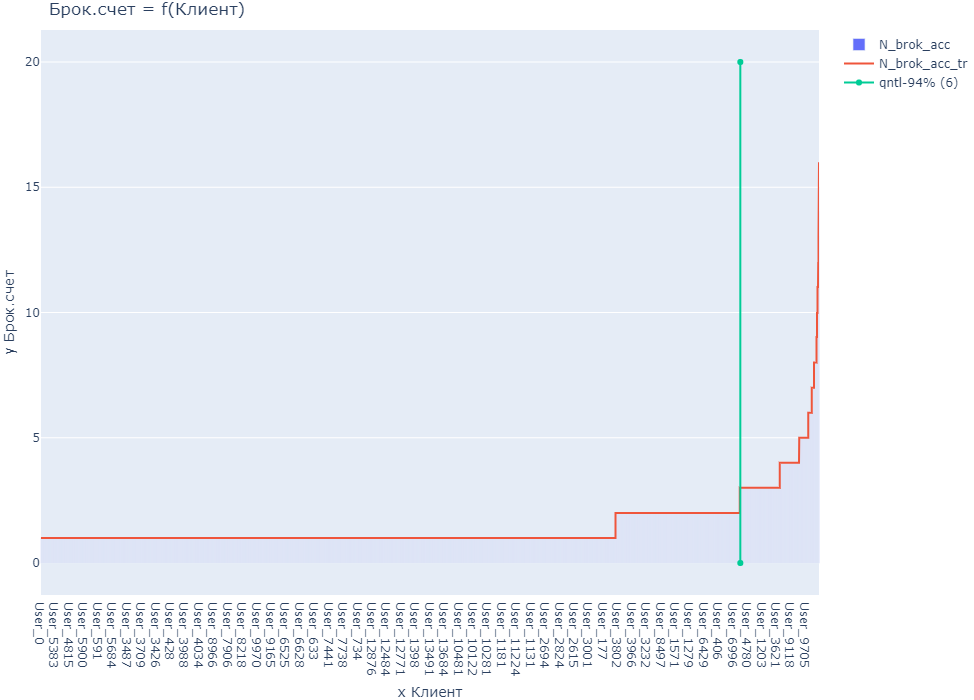

In [317]:
# Графический анализ
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# asmpt_1 = X_Y[X_Y['Клиент']==X_Y['Клиент'].quantile(.7)][0:1].index.values[0]

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Bar(x=df_DB_fltr.index, y=df_DB_fltr['Брокерский счет'].values, name='N_brok_acc'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_DB_fltr.index, y=df_DB_fltr['Брокерский счет'].values, name='N_brok_acc_tr'), row=1, col=1)
fig.add_trace(go.Scatter(x=['User_4843']*2, y=[0,20], name='qntl-94% (6)'))

fig.update_layout(legend_orientation="v",
                  legend=dict(x=1.2, xanchor="right"),
                  title="Брок.счет = f(Клиент)",
                  xaxis_title="x Клиент",
                  yaxis_title="y Брок.счет",
                  margin=dict(l=0, r=0, t=30, b=0)
                 )
fig.update_layout(
    autosize=False,
    width=900,
    height=700,)

fig.show()

In [318]:
df_any.describe()

,Период,Возраст
count,17271,17271.000000
mean,169 days 00:42:32.581217638,34.663181
std,102 days 04:28:34.854559203,3.167708
min,0 days 00:00:35,5.891855
25%,90 days 08:42:17.256627,31.865845
50%,143 days 07:09:07.256627,34.721424
75%,230 days 09:59:07.756627,37.462012
max,420 days 11:18:35.256627,39.991786


In [319]:
# 2Seсurity
# df_BA_fltr = df_DB_fltr[df_DB_fltr['Дата рождения'] == 1].sort_values(['Брокерский счет'])
# df_BA_fltr = df_BA_fltr.rename(columns={'Дата рождения':'ДР', 'Брокерский счет':'БС', 'Услуга':'У',
#                            'Начало':'Н', 'Окончание':'О', 'Окончание2':'О2', 'Возраст':'В'
#                           })
# np.max(df_BA_fltr)

In [320]:
# df_any_fltr = df_BA_fltr[['БС']].join(df_any.set_index('Клиент'), on=['Клиент'], how='left') #lsuffix='_left', rsuffix='_right'
# df_any_fltr

### 2 Law
#### 2.1 Age < 18

In [213]:
# возраст < 18
# min Age - 5.889117

In [321]:
# 2Lawyer
df_any[df_any['Возраст'] < 18]

,Клиент,Дата рождения,Брокерский счет,Услуга,Начало,Окончание,Окончание2,Период,Возраст
11306,User_6066,2015-04-07,Broker_account_7044,Strategy_59,2020-08-07 16:48:07,0,2021-02-26 00:21:07.256627,202 days 07:33:00.256627,5.891855


### 3 Product
#### 3.1 Low Service Usage

In [322]:
df_any_fltr=\
df_any[df_any['Возраст'] >= 18][['Клиент','Дата рождения', 'Брокерский счет', 'Услуга', 'Начало',
                                          'Окончание', 'Окончание2', 'Период', 'Возраст']].reset_index(drop=True)
df_any_fltr.head()
# df_any_fltr3['Клиент'] = df_any_fltr3.index

,Клиент,Дата рождения,Брокерский счет,Услуга,Начало,Окончание,Окончание2,Период,Возраст
0,User_0,1989-03-02,Broker_account_0,Strategy_0,2020-06-17 12:28:00,0,2021-02-26 00:21:07.256627,253 days 11:53:07.256627,31.989049
1,User_1,1981-07-15,Broker_account_1,Strategy_0,2020-11-27 16:39:12,2021-02-02 15:11:57,2021-02-02 15:11:57,66 days 22:32:45,39.619439
2,User_10,1988-08-14,Broker_account_10,Strategy_2,2020-12-09 11:59:27,0,2021-02-26 00:21:07.256627,78 days 12:21:40.256627,32.536619
3,User_10,1988-08-14,Broker_account_14023,Strategy_238,2020-09-24 12:54:06,2021-02-04 16:49:55,2021-02-04 16:49:55,133 days 03:55:49,32.536619
4,User_10,1988-08-14,Broker_account_14024,Strategy_236,2020-11-10 15:52:13,0,2021-02-26 00:21:07.256627,107 days 08:28:54.256627,32.536619


In [323]:
# 2Prod - Service
# df_any_fltr3.groupby(by=['Услуга', 'Клиент']).count()#.sort_values(['Брокерский счет'])


# Услугами мало пользуются
df_any_fltr.groupby(by=['Услуга']).count().sort_values(['Клиент'])

,Клиент,Дата рождения,Брокерский счет,Начало,Окончание,Окончание2,Период,Возраст
Услуга,,,,,,,,
Strategy_27,1,1,1,1,1,1,1,1
Strategy_306,1,1,1,1,1,1,1,1
Strategy_178,1,1,1,1,1,1,1,1
Strategy_308,1,1,1,1,1,1,1,1
Strategy_313,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
Strategy_362,644,644,644,644,644,644,644,644
Strategy_18,717,717,717,717,717,717,717,717
Strategy_17,1398,1398,1398,1398,1398,1398,1398,1398


In [324]:
# Услугами мало пользуются
X_Y = df_any_fltr.groupby(by=['Услуга']).count().sort_values(['Клиент'])

In [325]:
# import pandas_profiling
# pandas_profiling.ProfileReport(X_Y[['Клиент']])
X_Y['Клиент'].describe().transpose(), len(df_any_fltr3['Клиент'].unique()), len(df_any_fltr3['Услуга'].unique())

(count     331.000000
 mean       52.175227
 std       164.390682
 min         1.000000
 25%         2.000000
 50%         5.000000
 75%        23.000000
 max      1502.000000
 Name: Клиент, dtype: float64,
 6991,
 254)

In [326]:
X_Y['Клиент'].quantile(.7),\
X_Y['Клиент'].quantile(.7)/len(df_any_fltr3['Услуга'].unique())*100,\
X_Y['Клиент'].quantile(.8),\
X_Y['Клиент'].quantile(.8)/len(df_any_fltr3['Услуга'].unique())*100

(15.0, 5.905511811023622, 36.0, 14.173228346456693)

In [327]:
# X_Y[X_Y['Клиент']==X_Y['Клиент'].quantile(.7)].index
# X_Y[X_Y['Клиент']==X_Y['Клиент'].quantile(.8)].index

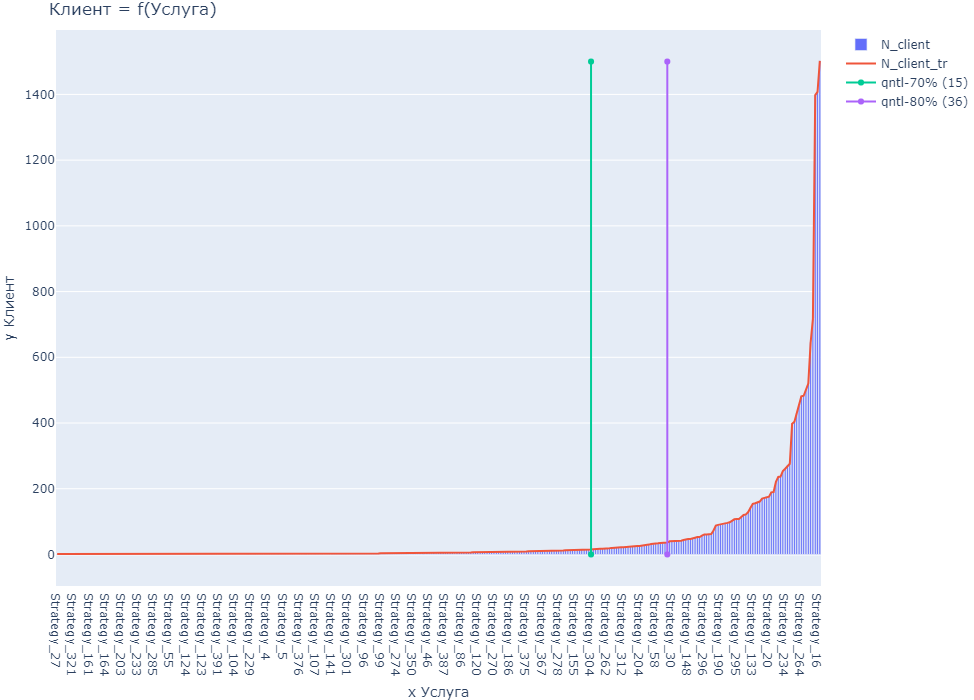

In [328]:
# Графический анализ
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# asmpt_1 = X_Y[X_Y['Клиент']==X_Y['Клиент'].quantile(.7)][0:1].index.values[0]
# asmpt_2 = X_Y[X_Y['Клиент']==X_Y['Клиент'].quantile(.8)][0:1].index.values[0]

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Bar(x=X_Y.index, y=X_Y['Клиент'].values, name='N_client'), row=1, col=1)
fig.add_trace(go.Scatter(x=X_Y.index, y=X_Y['Клиент'].values, name='N_client_tr'), row=1, col=1, )
fig.add_trace(go.Scatter(x=['Strategy_304']*2, y=[0,1500], name='qntl-70% (15)'))
fig.add_trace(go.Scatter(x=['Strategy_245']*2, y=[0,1500], name='qntl-80% (36)'))

fig.update_layout(legend_orientation="v",
                  legend=dict(x=1.2, xanchor="right"),
                  title="Клиент = f(Услуга)",
                  xaxis_title="x Услуга",
                  yaxis_title="y Клиент",
                  margin=dict(l=0, r=0, t=30, b=0)
                 )
fig.update_layout(
    autosize=False,
    width=900,
    height=700,)

fig.show()

#### 3.2 Period Service Usage

In [329]:
# Услугами не пользуются
X_Y = df_any_fltr.sort_values(by=['Период'])

# X_Y['Клиент'].describe().transpose(), len(df_any_fltr3['Клиент'].unique()), len(df_any_fltr3['Услуга'].unique())
f = lambda x: [x.days for x in df_any_fltr['Период']]
X_Y['Период'] = f(5)
X_Y = X_Y.sort_values(by=['Период'])
X_Y.head()

,Клиент,Дата рождения,Брокерский счет,Услуга,Начало,Окончание,Окончание2,Период,Возраст
7845,User_3783,1984-04-09,Broker_account_4236,Strategy_16,2020-02-25 17:45:51,0,2021-02-26 00:21:07.256627,0,36.884326
13707,User_8001,1990-11-13,Broker_account_12945,Strategy_258,2020-09-01 15:00:04,2020-12-07 20:49:09,2020-12-07 20:49:09,0,30.288843
13131,User_749,1989-05-15,Broker_account_826,Strategy_17,2020-05-26 14:00:12,2021-01-21 16:03:10,2021-01-21 16:03:10,0,31.786448
4323,User_1720,1986-11-13,Broker_account_1917,Strategy_17,2020-11-20 18:26:00,0,2021-02-26 00:21:07.256627,0,34.288843
6972,User_3286,1984-04-05,Broker_account_6811,Strategy_59,2020-06-30 22:59:51,0,2021-02-26 00:21:07.256627,0,36.895277


In [330]:
X_Y.describe()

,Период,Возраст
count,17270.000000,17270.000000
mean,168.599189,34.664847
std,102.190998,3.160224
min,0.000000,29.281314
25%,90.000000,31.865845
50%,143.000000,34.721424
75%,230.000000,37.462012
max,420.000000,39.991786


In [331]:
X_Y_p = X_Y.groupby(by=['Услуга']).mean().sort_values(['Период'])
X_Y_p.head()

,Период,Возраст
Услуга,,
Strategy_228,0.0,31.991786
Strategy_280,10.0,31.950719
Strategy_306,11.0,34.559890
Strategy_293,13.0,36.457221
Strategy_14,23.0,33.711157


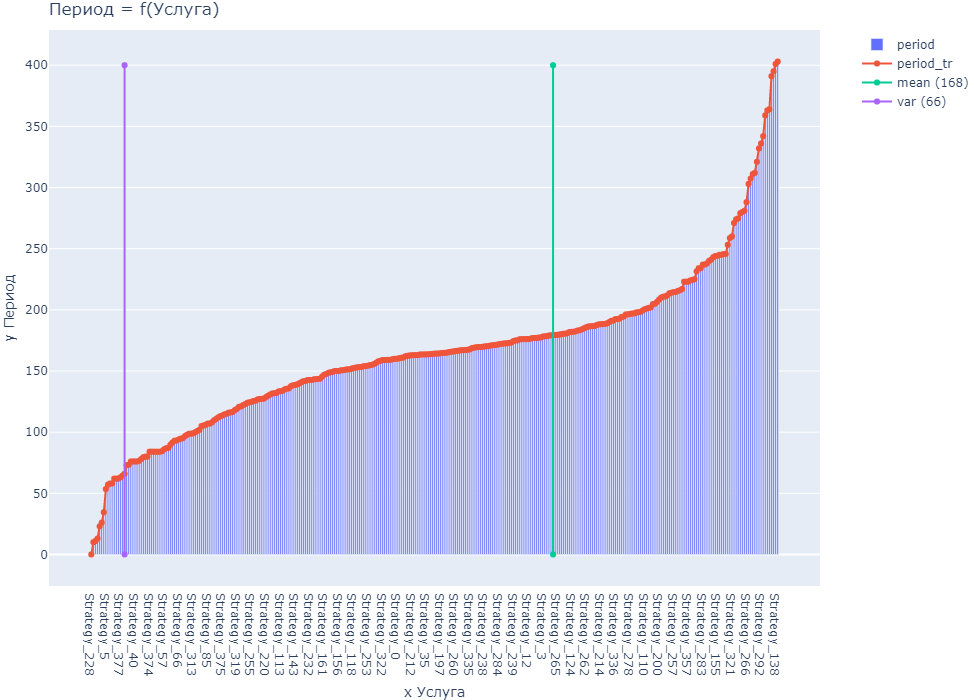

In [332]:
# Графический анализ
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# asmpt_1 = X_Y[X_Y['Клиент']==X_Y['Клиент'].quantile(.7)][0:1].index.values[0]
# asmpt_2 = X_Y[X_Y['Клиент']==X_Y['Клиент'].quantile(.8)][0:1].index.values[0]

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Bar(x=X_Y_p.index, y=X_Y_p['Период'].values, name='period'))
fig.add_trace(go.Scatter(x=X_Y_p.index, y=X_Y_p['Период'].values, name='period_tr', mode = 'lines+markers'))
fig.add_trace(go.Scatter(x=['Strategy_249']*2, y=[0,400], name='mean (168)'))
fig.add_trace(go.Scatter(x=['Strategy_121']*2, y=[0,400], name='var (66)'))

fig.update_layout(legend_orientation="v",
                  legend=dict(x=1.2, xanchor="right"),
                  title="Период = f(Услуга)",
                  xaxis_title="x Услуга",
                  yaxis_title="y Период",
                  margin=dict(l=0, r=0, t=30, b=0)
                 )
fig.update_layout(
    autosize=False,
    width=900,
    height=700,)

fig.show()

### 4 Market
#### 4.1 Low Service Usage

In [341]:
# df_any_open = df_any[df_any['Окончание'] == 0]
# df_any_close = df_any[df_any['Окончание'] != 0]
# X_Y[X_Y['Окончание'] ==0]
X_Y_cl = X_Y.groupby(by=['Клиент']).count().sort_values(['Услуга'])
X_Y_cl.head()

,Дата рождения,Брокерский счет,Услуга,Начало,Окончание,Окончание2,Период,Возраст
Клиент,,,,,,,,
User_0,1,1,1,1,1,1,1,1
User_5129,1,1,1,1,1,1,1,1
User_5127,1,1,1,1,1,1,1,1
User_5126,1,1,1,1,1,1,1,1
User_5125,1,1,1,1,1,1,1,1


In [353]:
X_Y_cl[X_Y_cl['Услуга']<3].shape[0]/X_Y_cl.shape[0]*100

85.87072390735536

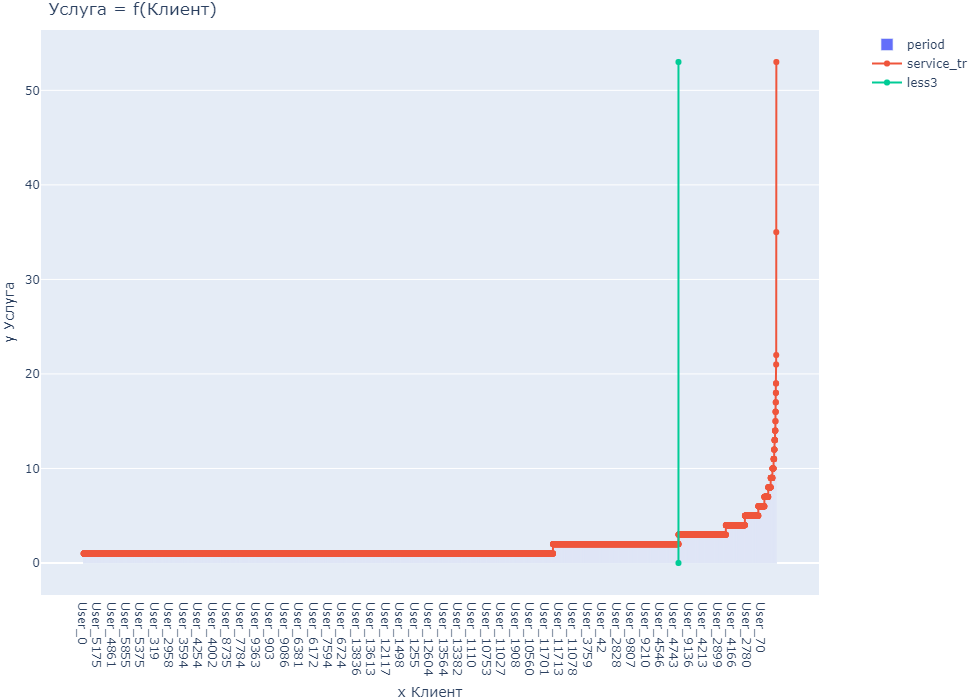

In [357]:
# Графический анализ
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# asmpt_1 = X_Y[X_Y['Клиент']==X_Y['Клиент'].quantile(.7)][0:1].index.values[0]
# asmpt_2 = X_Y[X_Y['Клиент']==X_Y['Клиент'].quantile(.8)][0:1].index.values[0]

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Bar(x=X_Y_cl.index, y=X_Y_cl['Период'].values, name='period'))
fig.add_trace(go.Scatter(x=X_Y_cl.index, y=X_Y_cl['Период'].values, name='service_tr', mode = 'lines+markers'))
fig.add_trace(go.Scatter(x=['User_1535']*2, y=[0,53], name='less3'))
# fig.add_trace(go.Scatter(x=['Strategy_121']*2, y=[0,50], name='var (66)'))

fig.update_layout(legend_orientation="v",
                  legend=dict(x=1.2, xanchor="right"),
                  title="Услуга = f(Клиент)",
                  xaxis_title="x Клиент",
                  yaxis_title="y Услуга",
                  margin=dict(l=0, r=0, t=30, b=0)
                 )
fig.update_layout(
    autosize=False,
    width=900,
    height=700,)

fig.show()

In [344]:
# Проверить отток клиентов (добавить проверку, что нет ни одной действующей услуги)
df_any_close = df_any[df_any['Окончание'] != 0]
df_any_close

,Клиент,Дата рождения,Брокерский счет,Услуга,Начало,Окончание,Окончание2,Период,Возраст
1,User_1,1981-07-15,Broker_account_1,Strategy_0,2020-11-27 16:39:12,2021-02-02 15:11:57,2021-02-02 15:11:57,66 days 22:32:45,39.619439
3,User_10,1988-08-14,Broker_account_14023,Strategy_238,2020-09-24 12:54:06,2021-02-04 16:49:55,2021-02-04 16:49:55,133 days 03:55:49,32.536619
11,User_10000,1989-08-01,Broker_account_14041,Strategy_244,2020-11-09 19:05:27,2020-12-24 13:24:11,2020-12-24 13:24:11,44 days 18:18:44,31.572895
13,User_10001,1984-07-15,Broker_account_14042,Strategy_237,2020-12-07 20:49:10,2020-12-26 23:17:55,2020-12-26 23:17:55,19 days 02:28:45,36.618754
14,User_10001,1984-07-15,Broker_account_14043,Strategy_251,2020-11-05 14:40:50,2020-12-17 00:47:36,2020-12-17 00:47:36,41 days 10:06:46,36.618754
...,...,...,...,...,...,...,...,...,...
17256,User_9994,1983-07-09,Broker_account_14028,Strategy_239,2020-11-24 20:27:42,2020-12-21 16:15:32,2020-12-21 16:15:32,26 days 19:47:50,37.637235
17257,User_9994,1983-07-09,Broker_account_14029,Strategy_236,2020-11-27 16:50:04,2021-01-19 11:01:44,2021-01-19 11:01:44,52 days 18:11:40,37.637235
17258,User_9994,1983-07-09,Broker_account_14030,Strategy_247,2020-11-30 14:02:33,2021-01-19 11:01:07,2021-01-19 11:01:07,49 days 20:58:34,37.637235
17260,User_9995,1984-05-15,Broker_account_14032,Strategy_246,2020-08-04 13:13:33,2021-01-19 13:41:35,2021-01-19 13:41:35,168 days 00:28:02,36.785763
